In [1]:
#import libarary
import numpy as np 
import pandas as pd 
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelEncoder
#difine input sequnece


In [2]:
seq_in = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# reshape input into [samples, timesteps, features]
n_in = len(seq_in)
seq_in = seq_in.reshape((1, n_in, 1))
# prepare output sequence
seq_out = seq_in[:, 1:, :]
n_out = n_in - 1
# define encoder
visible = Input(shape=(n_in,1))
encoder = LSTM(100, activation='relu')(visible)
# define reconstruct decoder

In [3]:
#difine encoder
decoder1 = RepeatVector(n_in)(encoder)
decoder1 = LSTM(100, activation='relu', return_sequences=True)(decoder1)
decoder1 = TimeDistributed(Dense(1))(decoder1)
#===========================================================================
#difine predict encoder 
dcoder2 = RepeatVector(n_out)(encoder)
dcoder2 =LSTM(100,activation= 'relu', return_sequences= True)(dcoder2)
decoder2 = TimeDistributed(Dense(1))(dcoder2)

In [4]:
model = Model(inputs=visible, outputs=[decoder1, decoder2])
model.compile(optimizer='adam', loss='mse')
plot_model(model, show_shapes=True, to_file='composite_lstm_autoencoder.png')
#fit model
model.fit(seq_in, [seq_in,seq_out], epochs=300, verbose=0)
# demonstrate prediction
yhat = model.predict(seq_in, verbose=0)
print(yhat)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
[array([[[0.10346144],
        [0.20127285],
        [0.30025068],
        [0.39986065],
        [0.49974057],
        [0.5996945 ],
        [0.6996811 ],
        [0.79980075],
        [0.90019614]]], dtype=float32), array([[[0.16679189],
        [0.29033756],
        [0.40314332],
        [0.50838697],
        [0.60860604],
        [0.7055057 ],
        [0.8004844 ],
        [0.8947435 ]]], dtype=float32)]


CNN LSTM
=
Note: Your results may differ depending on the random nature of the algorithm or evaluation method or the difference in numerical accuracy. Run the example several times and compare the average result.

Running the example predicts the next value in the sequence, which we expect to be 100.

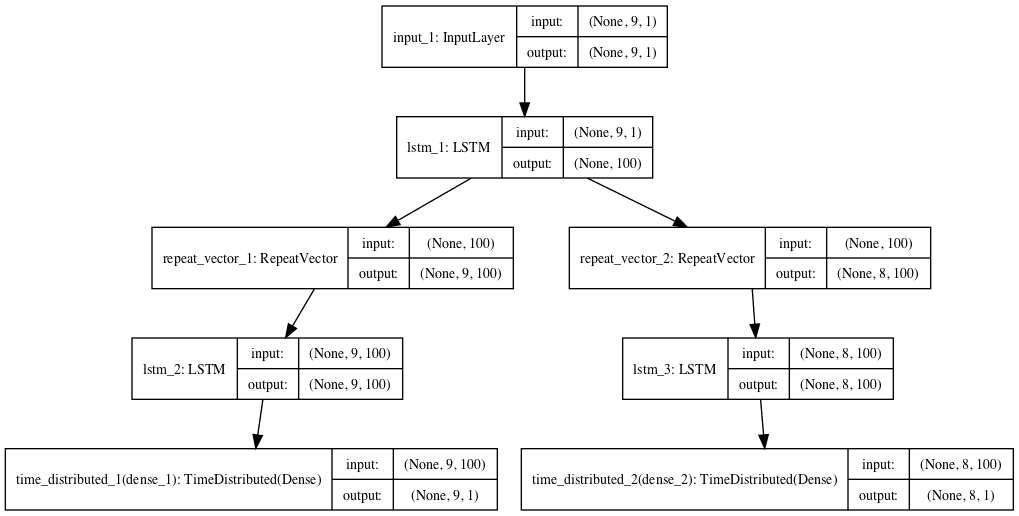